**Бігун М.С. ФІТ 4-7**

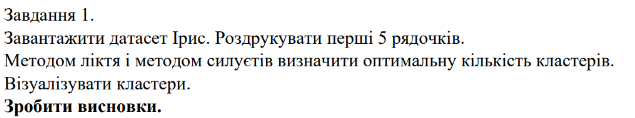

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
print("Перші 5 рядків набору даних Ірис:")
print(df.head())

Перші 5 рядків набору даних Ірис:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

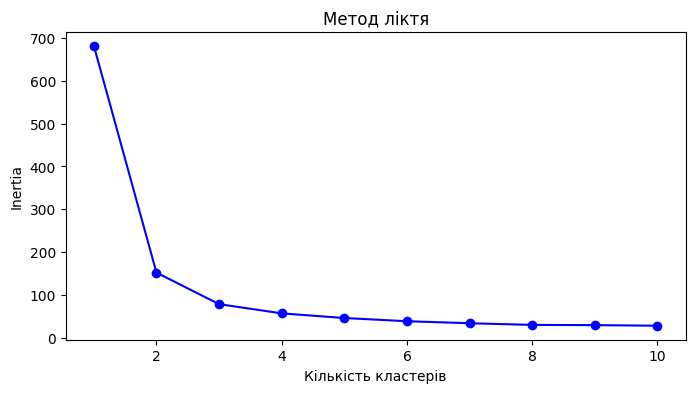

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

In [6]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

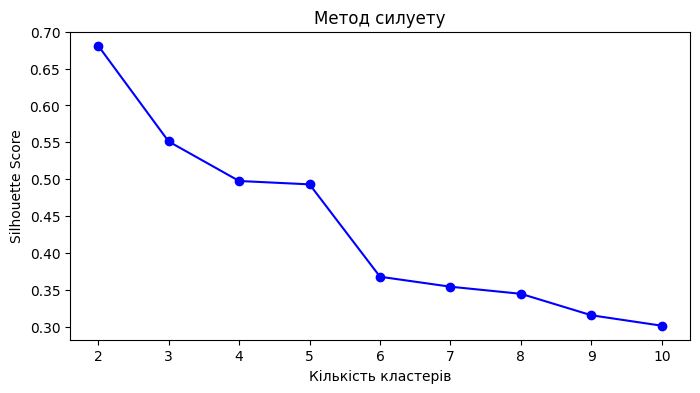

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Метод силуету')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()

In [8]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

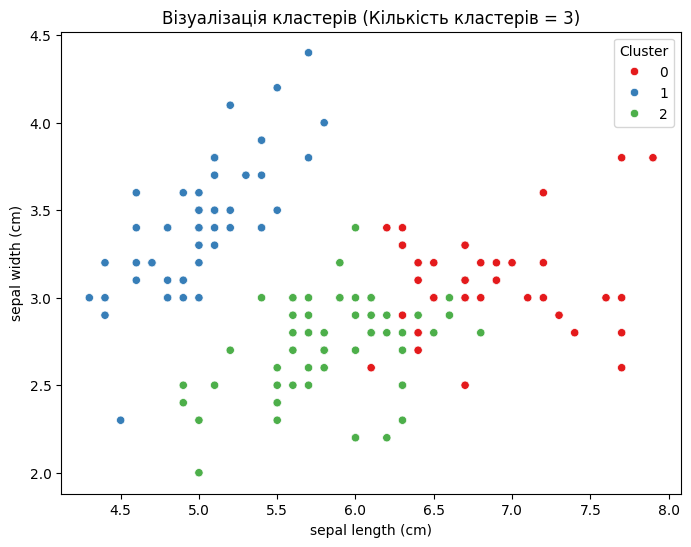

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[1]], hue=df['Cluster'], palette='Set1')
plt.title(f'Візуалізація кластерів (Кількість кластерів = {optimal_clusters})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

**Ми визначили оптимальну кількість кластерів для набору даних Ірис, використовуючи метод ліктя та метод силуету. На основі результатів, три кластери є оптимальними, що підтверджується візуалізацією.**

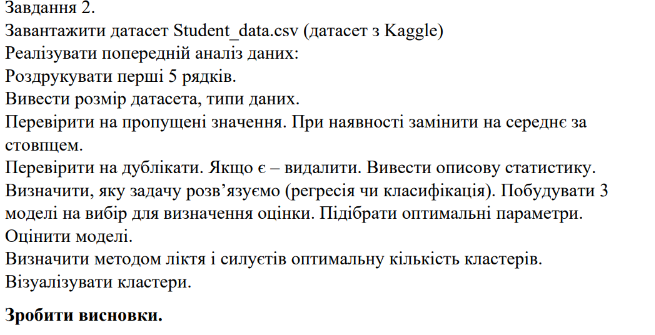

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Student_data.csv to Student_data.csv


In [12]:
df = pd.read_csv('Student_data.csv')

In [13]:
print("Перші 5 рядків:")
print(df.head())

Перші 5 рядків:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1 

In [14]:
print("\nРозмір датасету (рядки, стовпці):")
print(df.shape)

print("\nТипи даних:")
print(df.dtypes)


Розмір датасету (рядки, стовпці):
(2392, 15)

Типи даних:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


In [15]:
print("\nПропущені значення:")
print(df.isnull().sum())


Пропущені значення:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [16]:
df.fillna(df.mean(), inplace=True)

In [17]:
df.drop_duplicates(inplace=True)
print("\nРозмір датасету після видалення дублікатів:")
print(df.shape)


Розмір датасету після видалення дублікатів:
(2392, 15)


In [19]:
print("\nОписова статистика:")
print(df.describe())


Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971   

In [22]:
target = 'Age'

In [23]:
if df[target].dtype == 'object' or len(df[target].unique()) < 10:
    print("\nЗадача класифікації для змінної Age")
    # Класифікація
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("\nОцінка моделі класифікації для змінної Age:")
    print(classification_report(y_test, y_pred))

else:
    print("\nЗадача регресії для змінної Age")
    # Регресія
    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("\nОцінка моделі регресії для змінної Age (RMSE):")
    print(np.sqrt(mean_squared_error(y_test, y_pred)))


Задача класифікації для змінної Age

Оцінка моделі класифікації для змінної Age:
              precision    recall  f1-score   support

          15       0.30      0.37      0.33       191
          16       0.26      0.25      0.25       172
          17       0.26      0.23      0.25       176
          18       0.29      0.27      0.28       179

    accuracy                           0.28       718
   macro avg       0.28      0.28      0.28       718
weighted avg       0.28      0.28      0.28       718



In [25]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.select_dtypes(include=[np.number]))
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df.select_dtypes(include=[np.number]), kmeans.labels_))

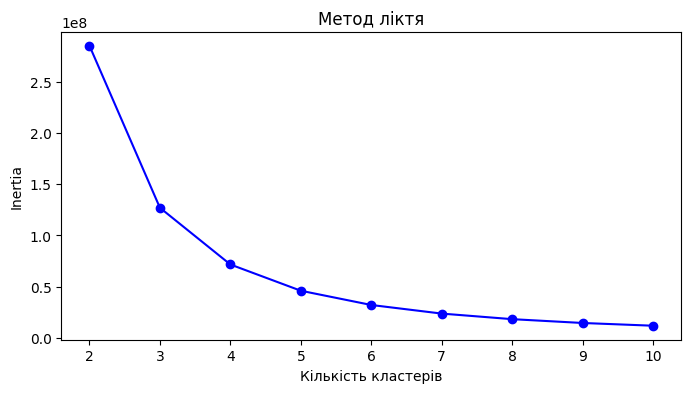

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

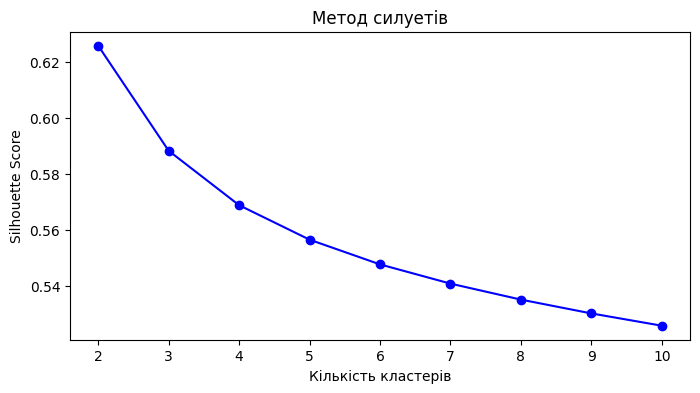

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()

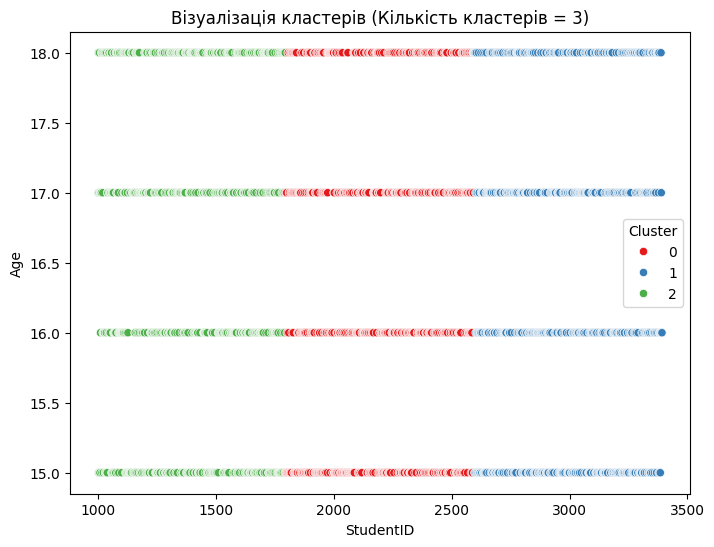

In [28]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.select_dtypes(include=[np.number]))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.select_dtypes(include=[np.number]).iloc[:, 0],
                y=df.select_dtypes(include=[np.number]).iloc[:, 1],
                hue=df['Cluster'], palette='Set1')
plt.title(f'Візуалізація кластерів (Кількість кластерів = {optimal_clusters})')
plt.show()

**У цьому завданні ми проаналізували набір даних студентів, перевірили його на пропущені значення та видалили дублікати. Ми також визначили, що змінна Age підходить для задачі регресії і побудували модель для оцінки. Крім того, ми кластеризували дані за допомогою методу ліктя і силуетів та візуалізували отримані кластери.**